# 量子エンタングルメント

- 量子エンタングルメント状態を測定結果から説明する

- SPDCのような物質から生成するエンタングルメントは別に譲る

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

## 量子エンタングルメント状態

2つの任意の量子状態

$$
    \begin{align}
        &| \psi_a \rangle = \alpha_a | 0 \rangle + \beta_a | 1 \rangle \tag{1} \\
        &| \psi_b \rangle = \alpha_b | 0 \rangle + \beta_b | 1 \rangle \tag{2}
    \end{align}
$$
ここで$\alpha_a, \beta_a, \alpha_b, \beta_b$は

$$
    | \alpha_a |^2 + | \beta_a |^2 = 1, | \alpha_b |^2 + | \beta_b |^2 = 1
$$
を満たす複素数とし

$$
    | \psi_a \rangle \otimes | \psi_b \rangle = \alpha_a \alpha_b | 00 \rangle + \alpha_a \beta_b | 01 \rangle + \beta_a \alpha_b | 10 \rangle + \beta_a \beta_b | 11 \rangle
$$

を考えた時にそれぞれの純粋状態が(1)(2)からなる2量子の合成系の量子状態$| \psi_{\mathrm{comp}} \rangle $について以下の場合分けがある

$$
    | \psi_{\mathrm{comp}} \rangle = 
        \begin{cases} 
            | \psi_a \rangle \otimes | \psi_b \rangle \quad \mathrm{: separable \ state} \\
            a | 00 \rangle + b | 01 \rangle + c | 10 \rangle + d | 11 \rangle \quad (a \neq \alpha_a \alpha_b, b \neq \alpha_a \beta_b, c \neq \beta_a \alpha_b, d \neq \beta_a \beta_b) \mathrm{: entangled \ state}
        \end{cases}
$$

### separable state

$$
    | \psi_{\mathrm{comp}} \rangle = | \psi_a \rangle \otimes | \psi_b \rangle
$$
つまり、それぞれの量子が独立した場合の量子状態の単純な積で記述できるということで、２つの量子の間に何も相関がない場合を表す。

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


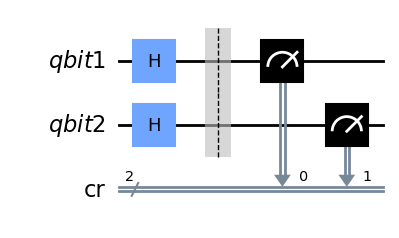

In [3]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')

cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='separable')

qc.h(qbit_1)
qc.h(qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

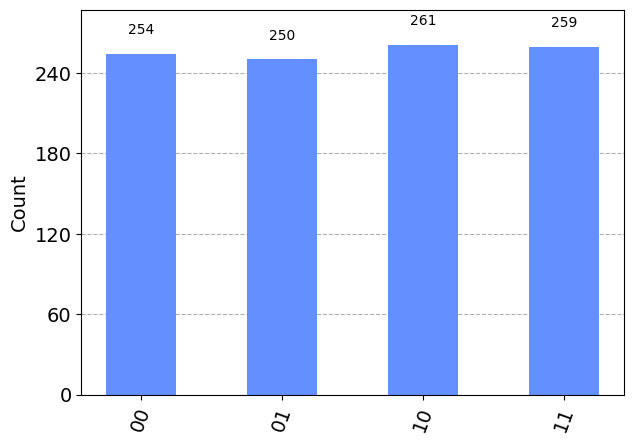

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

### maximally entangled state

2量子ビット系では４状態あり、Bell状態と呼ばれる

Bell状態を作る、はいいけど、アダマールとCNOTが急に現れる気がするけど大丈夫かな

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


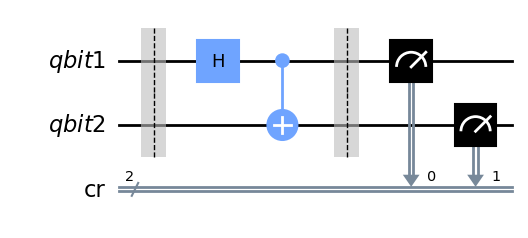

In [7]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')
cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='bell')

qc.barrier(qbit_1, qbit_2)

qc.h(qbit_1)
qc.cx(qbit_1, qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

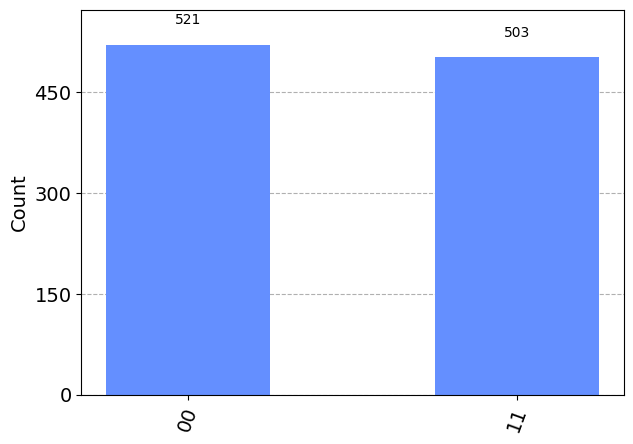

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


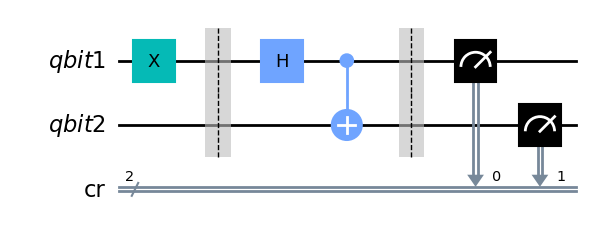

In [9]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')
cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='bell')

qc.x(qbit_1)

qc.barrier(qbit_1, qbit_2)

qc.h(qbit_1)
qc.cx(qbit_1, qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

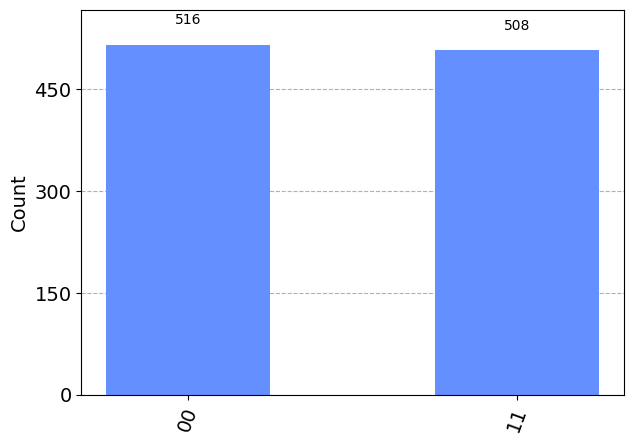

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


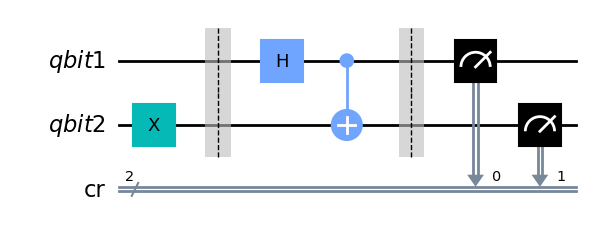

In [11]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')
cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='bell')

qc.x(qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.h(qbit_1)
qc.cx(qbit_1, qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

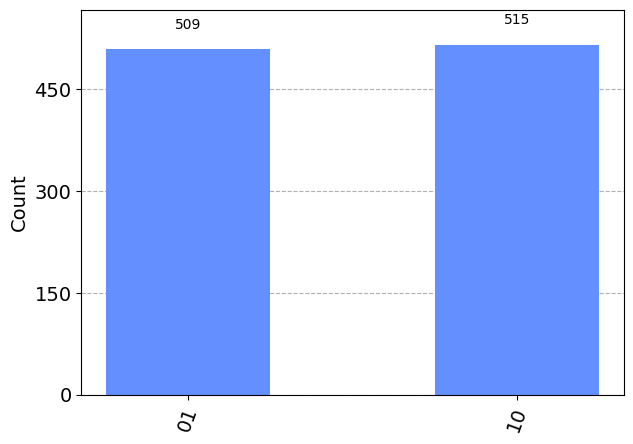

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


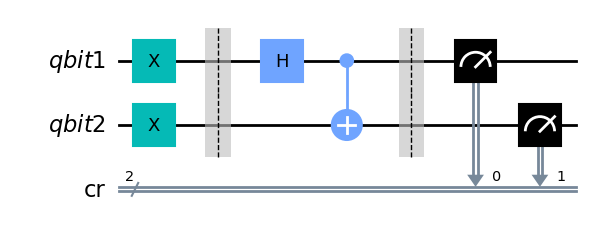

In [13]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')
cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='bell')

qc.x(qbit_1)
qc.x(qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.h(qbit_1)
qc.cx(qbit_1, qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

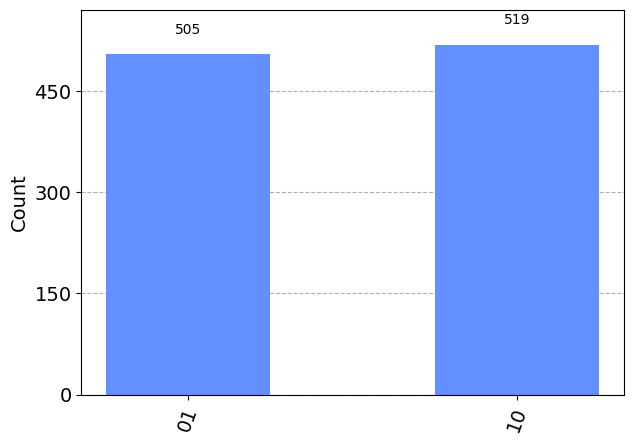

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

アダマールとCNOTの性質とそれからBell状態の導出

### (intermediate) entangled state

In [19]:
import numpy as np

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


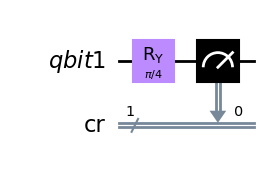

In [56]:
qbit_1 = QuantumRegister(1, name='qbit1')
cr = ClassicalRegister(1, name='cr')

qc = QuantumCircuit(qbit_1, cr, name='bell')

qc.ry(np.pi/4, qbit_1)

qc.measure(qbit_1, cr)

qc.draw(output='mpl')

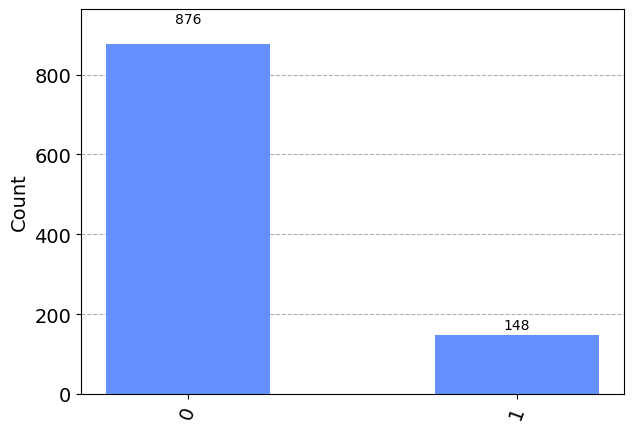

In [57]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


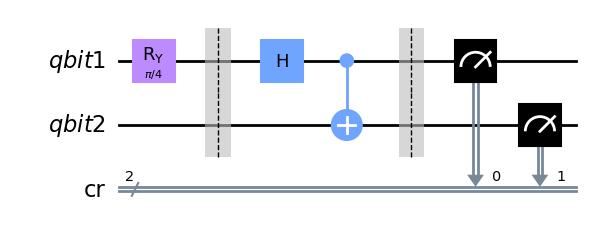

In [54]:
qbit_1 = QuantumRegister(1, name='qbit1')
qbit_2 = QuantumRegister(1, name='qbit2')
cr = ClassicalRegister(2, name='cr')

qc = QuantumCircuit(qbit_1, qbit_2, cr, name='bell')

qc.ry(np.pi*(1/4), qbit_1)

qc.barrier(qbit_1, qbit_2)

qc.h(qbit_1)
qc.cx(qbit_1, qbit_2)

qc.barrier(qbit_1, qbit_2)

qc.measure(qbit_1, cr[0])
qc.measure(qbit_2, cr[1])

qc.draw(output='mpl')

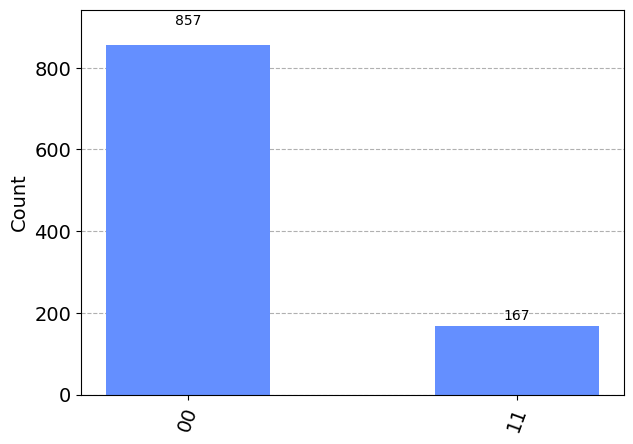

In [55]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

$$
    \begin{align}
        &\left ( \cos  \frac{\pi}{8} | o \rangle + \sin \frac{\pi}{8} | 1 \rangle \right) | 0 \rangle \\
        &\rightarrow \frac{1}{\sqrt{2}} \left\{ \cos \frac{\pi}{8} \left( | 0 \rangle + | 1 \rangle \right) + \sin \frac{\pi}{8} \left( | 0 \rangle + | 1 \rangle \right) \right\} | 0 \rangle \\
        &= \frac{1}{\sqrt{2}} \left\{ \left( \cos \frac{\pi}{8} + \sin \frac{\pi}{8} \right) | 0 \rangle + \left( \cos \frac{\pi}{8} - \sin \frac{\pi}{8} \right) | 1 \rangle \right\} | 0 \rangle \\
        &\rightarrow \frac{1}{\sqrt{2}} \left\{ \left( \cos \frac{\pi}{8} + \sin \frac{\pi}{8} \right) | 00 \rangle + \left( \cos \frac{\pi}{8} - \sin \frac{\pi}{8} \right) | 11 \rangle \right\}
    \end{align}
$$

## 量子テレポーテーション

In [3]:
def entanglement(qc, control, target):
    qc.h(control)
    qc.cx(control, target)

def z_measure(qc, qr, cr):
    qc.measure(qr, cr)

def x_measure(qc, qr, cr):
    qc.h(qr_node1[0])
    qc.measure(qr_node1[0], cr_node1_x)

def bell_measure(qc, qr_x, cr_x, qr_z, cr_z):
    qc.cx(qr_x, qr_z)
    x_measure(qc, qr_x, cr_x)
    z_measure(qc, qr_z, cr_z)
    

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


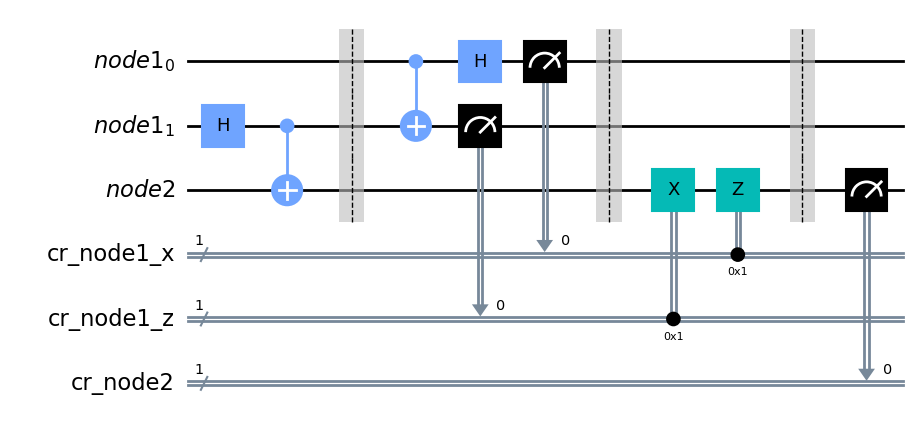

In [4]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

## 入力が | 0 >の場合

### 量子エンタングルメントが存在する場合

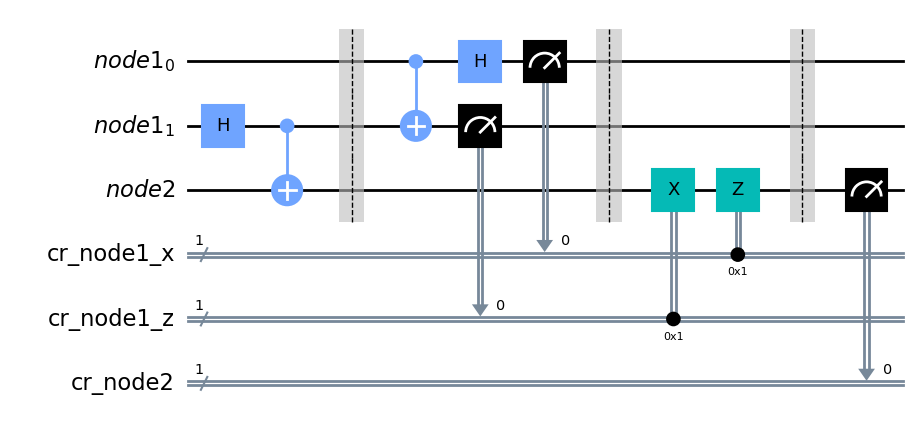

In [5]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

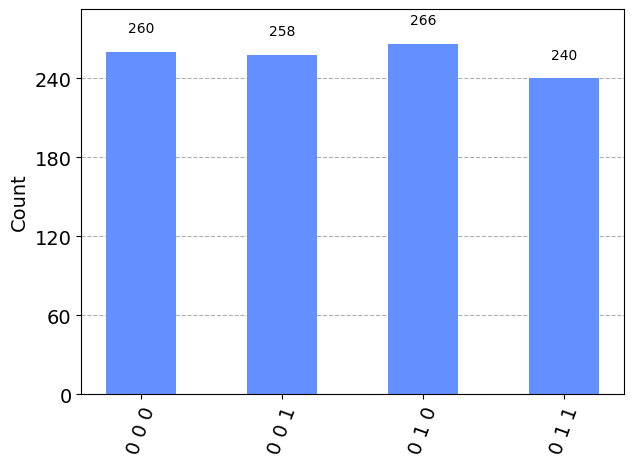

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


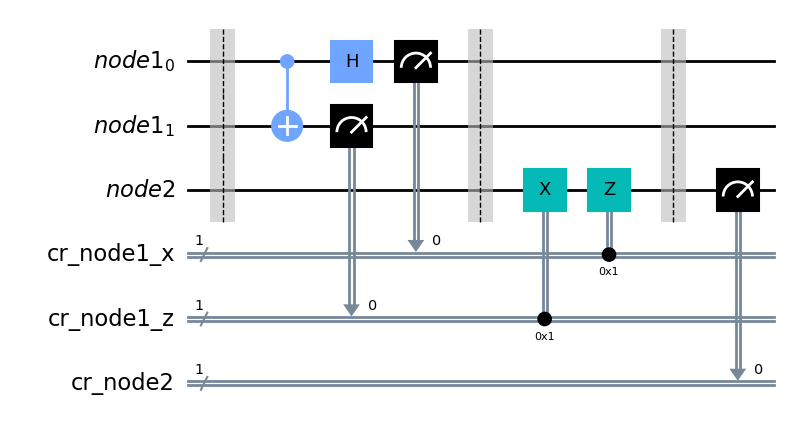

In [9]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

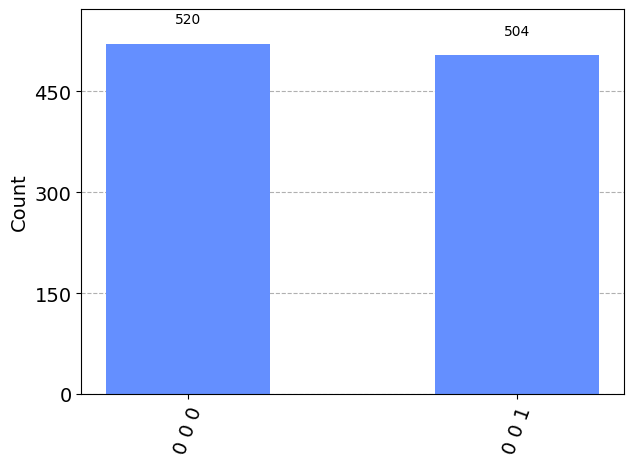

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

## 入力が | 1 >の場合

### 量子エンタングルメントが存在する場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


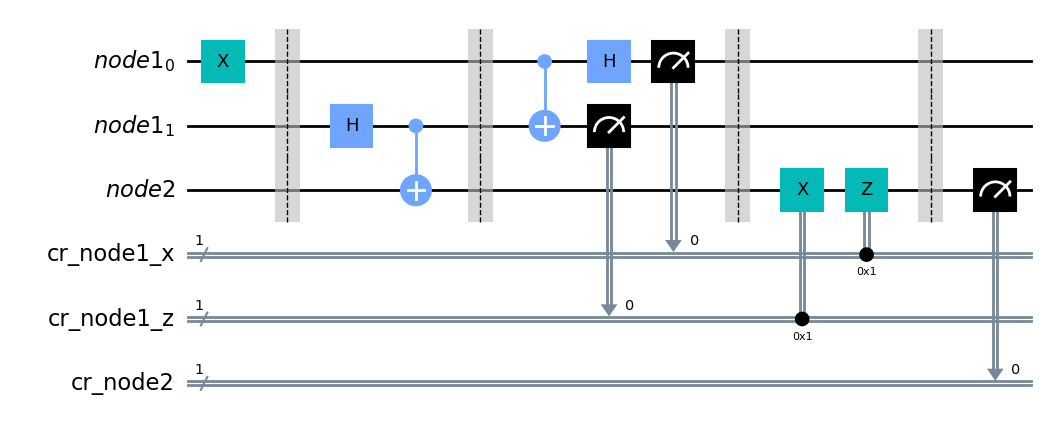

In [11]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.x(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

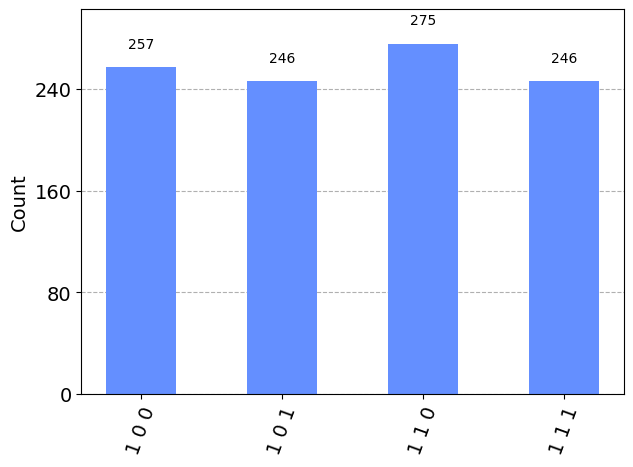

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


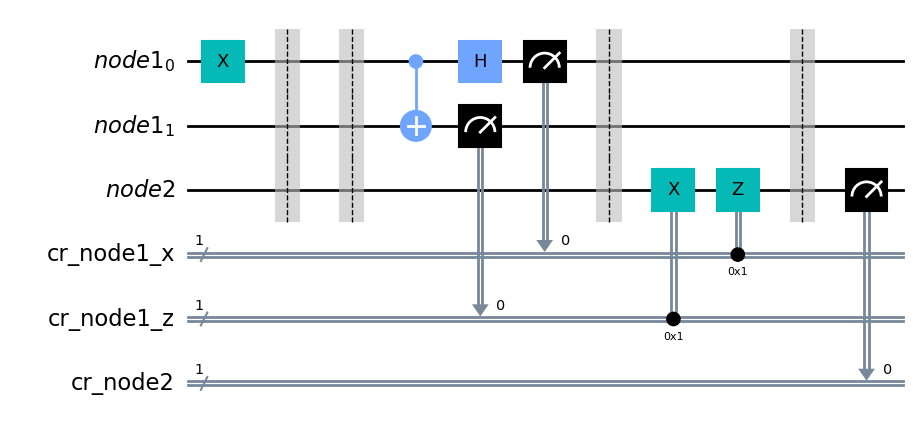

In [13]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.x(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

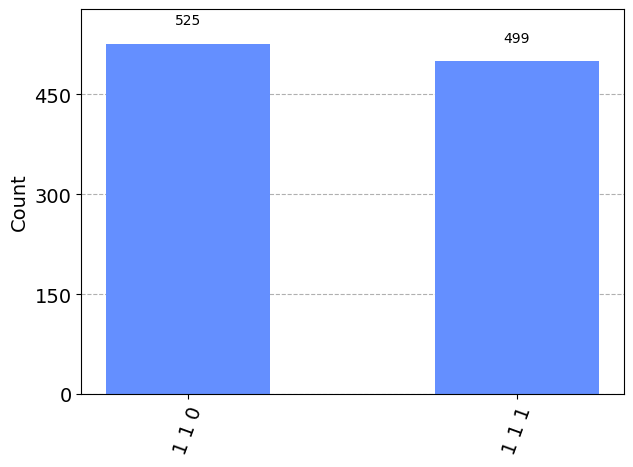

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

## 入力が | + >の場合

### 量子エンタングルメントが存在する場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


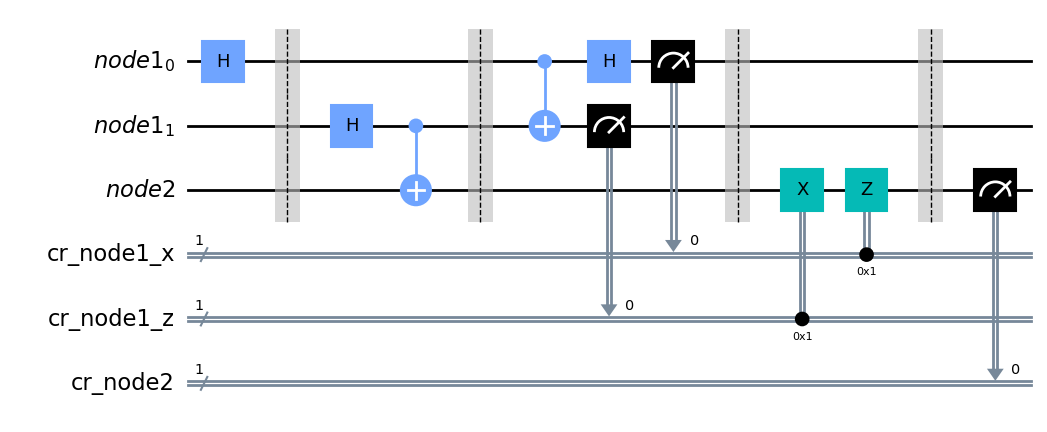

In [15]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.h(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

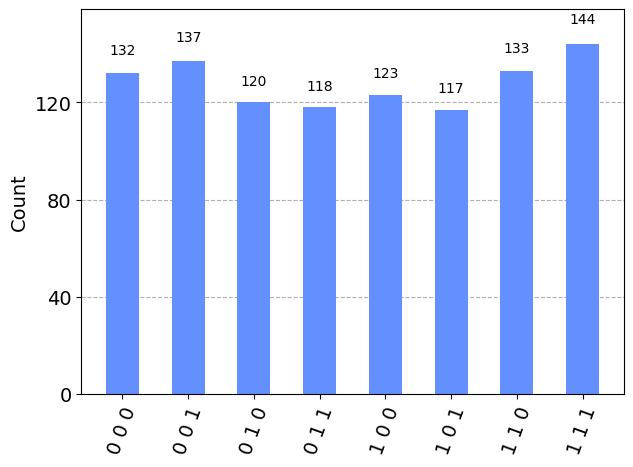

In [16]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

因数分解していくと受信側で|+>の純粋状態を取り出せる

### 量子エンタングルメントが存在しない場合

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


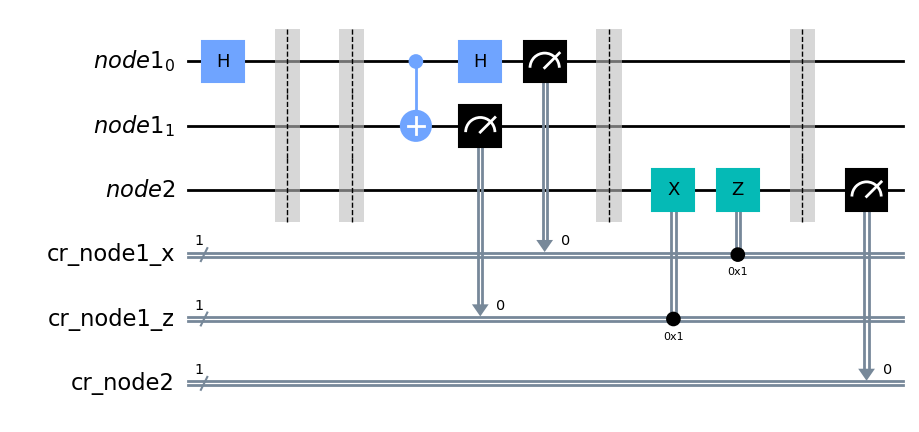

In [17]:
qr_node1 = QuantumRegister(2, name='node1')
qr_node2 = QuantumRegister(1, name='node2')
cr_node1_x = ClassicalRegister(1, name='cr_node1_x')
cr_node1_z = ClassicalRegister(1, name='cr_node1_z')
cr_node2 = ClassicalRegister(1, name='cr_node2')

qc = QuantumCircuit(qr_node1, cr_node1_x, cr_node1_z, qr_node2, cr_node2, name='teleportation')

qc.h(qr_node1[0])
qc.barrier(qr_node1, qr_node2)

# entanglement(qc, qr_node1[1], qr_node2)
qc.barrier(qr_node1, qr_node2)

bell_measure(qc, qr_node1[0], cr_node1_x, qr_node1[1], cr_node1_z)
qc.barrier(qr_node1, qr_node2)

qc.x(qr_node2).c_if(cr_node1_z, 1)
qc.z(qr_node2).c_if(cr_node1_x, 1)
qc.barrier(qr_node1, qr_node2)

qc.measure(qr_node2, cr_node2)

qc.draw(output='mpl')

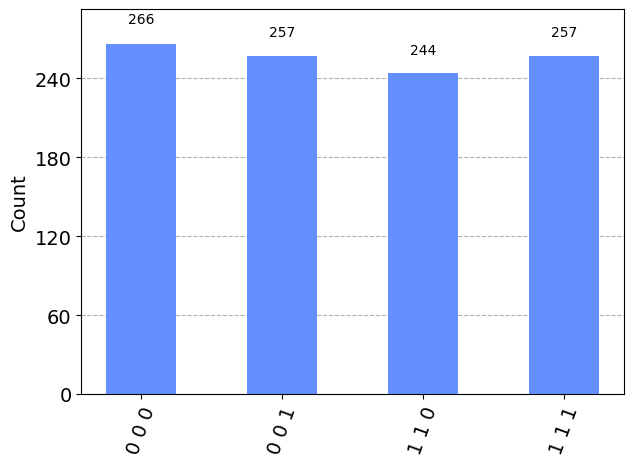

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
plot_histogram(count)

受信側で純粋状態を取り出せない

## 量子エンタングルメントとは